In [1]:
import numpy as np
import pandas as pd
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 16,4

Populating the interactive namespace from numpy and matplotlib


In [2]:
series = pd.Series.from_csv('ibm_daily_1962-2018.csv', sep='\t',header=0)

/Users/ludovicavasile/anaconda3/envs/py27/lib/python2.7/site-packages/pandas/core/series.py:2849: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [3]:
#plot(series)

/Users/ludovicavasile/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


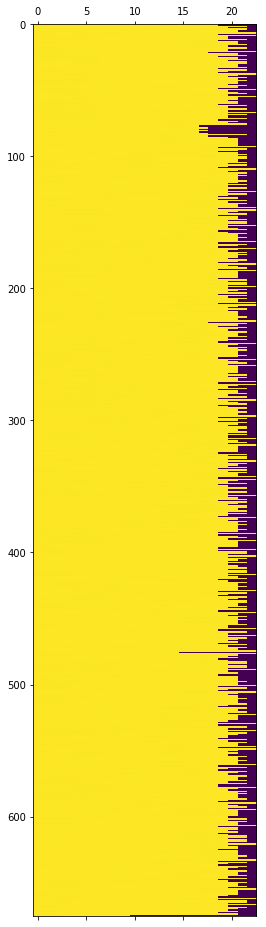

In [4]:
from pandas import TimeGrouper
from pandas import DataFrame
groups = series.groupby(TimeGrouper('M'))

mm = DataFrame()
for name, group in groups:
    norm_values = (group.values - mean(group.values)) / std(group.values)
    # Padding performed to have series of same length -- important only for plotting the matrix
    pad_values = np.pad(norm_values,(0,23-len(norm_values)),'constant',constant_values=-1000)
    mm["%s-%s" % (name.year,name.month)] = pad_values
matshow(mm.T, interpolation=None, aspect='auto')

In [5]:
mm.columns #num mesi=676

Index([u'1962-1', u'1962-2', u'1962-3', u'1962-4', u'1962-5', u'1962-6',
       u'1962-7', u'1962-8', u'1962-9', u'1962-10',
       ...
       u'2017-7', u'2017-8', u'2017-9', u'2017-10', u'2017-11', u'2017-12',
       u'2018-1', u'2018-2', u'2018-3', u'2018-4'],
      dtype='object', length=676)

In [6]:
mm #num giorni max=23

,1962-1,1962-2,1962-3,1962-4,1962-5,1962-6,1962-7,1962-8,1962-9,1962-10,...,2017-7,2017-8,2017-9,2017-10,2017-11,2017-12,2018-1,2018-2,2018-3,2018-4
0,1.781561,0.101219,-1.675679,1.732179,0.331695,2.056092,-2.030014,-0.272279,1.288357,0.215550,...,0.866861,1.535833,-1.855261,-1.142757,1.488068,0.065655,-2.688513,2.203186,-0.245006,-0.109530
1,1.263226,1.029650,0.129954,0.940024,0.850906,1.579409,-1.199805,-1.145584,0.582919,-0.843119,...,1.462073,1.614825,-1.343868,-0.900045,1.529437,1.179028,-1.869645,1.806668,-1.179861,-0.992709
2,1.661944,1.493870,0.129954,-0.380237,0.932031,0.712707,-1.083968,-0.295265,0.220121,-0.107211,...,0.807068,1.160600,-0.970156,-0.843895,1.136366,1.528731,-1.203592,0.792755,-0.726081,-2.004544
3,1.143609,0.565439,-0.271300,-0.327424,1.248424,0.891464,-1.508725,-0.364210,0.623226,-0.300871,...,0.605945,1.535833,-0.753799,-0.901858,0.282986,-0.148444,-0.399137,-1.229752,0.352072,0.272952
4,0.266419,0.698069,-0.170982,0.517544,1.370114,1.059388,-1.585952,-0.858318,0.159655,0.654515,...,0.684766,1.535833,-1.688078,-0.909102,0.076101,-0.512435,-0.335703,-0.197208,-0.425835,-0.067801
5,-0.331665,0.698069,0.180105,0.464731,1.000988,1.156889,-0.717126,-1.444350,0.320894,0.912725,...,0.779888,-0.439054,-1.304538,-0.934460,0.195063,0.479600,0.021829,-0.646950,0.938915,-0.645000
6,0.067060,0.764389,0.531192,0.517544,0.510175,1.200226,-0.524056,-0.685949,0.179808,0.990197,...,0.839681,-0.603628,0.239470,-0.715293,-0.668672,0.822181,-0.263619,-1.679489,0.416899,0.478100
7,0.186676,1.294920,1.133065,0.728780,0.234344,0.496030,0.750228,-1.145584,0.270508,1.532436,...,0.899474,-0.676041,0.475500,-0.590316,-0.296285,2.135375,0.281333,-1.067419,1.157274,0.248610
8,0.625269,1.361240,1.032763,-0.010562,0.299246,-0.365254,1.039830,-1.191550,0.260428,0.796529,...,0.983727,-0.142823,0.977049,-0.742464,-1.211728,1.635791,0.056432,-1.067419,1.310808,1.076160
9,0.784759,0.167539,0.932446,-0.591473,0.072093,-0.906940,0.827455,-0.938749,0.703846,0.473760,...,0.869578,-0.439054,-0.045722,-0.756954,-1.692730,0.208403,0.367834,-1.256361,1.338103,1.743761


In [7]:
#mm = mm.drop('2018-4', 1)

In [8]:
mm

,1962-1,1962-2,1962-3,1962-4,1962-5,1962-6,1962-7,1962-8,1962-9,1962-10,...,2017-7,2017-8,2017-9,2017-10,2017-11,2017-12,2018-1,2018-2,2018-3,2018-4
0,1.781561,0.101219,-1.675679,1.732179,0.331695,2.056092,-2.030014,-0.272279,1.288357,0.215550,...,0.866861,1.535833,-1.855261,-1.142757,1.488068,0.065655,-2.688513,2.203186,-0.245006,-0.109530
1,1.263226,1.029650,0.129954,0.940024,0.850906,1.579409,-1.199805,-1.145584,0.582919,-0.843119,...,1.462073,1.614825,-1.343868,-0.900045,1.529437,1.179028,-1.869645,1.806668,-1.179861,-0.992709
2,1.661944,1.493870,0.129954,-0.380237,0.932031,0.712707,-1.083968,-0.295265,0.220121,-0.107211,...,0.807068,1.160600,-0.970156,-0.843895,1.136366,1.528731,-1.203592,0.792755,-0.726081,-2.004544
3,1.143609,0.565439,-0.271300,-0.327424,1.248424,0.891464,-1.508725,-0.364210,0.623226,-0.300871,...,0.605945,1.535833,-0.753799,-0.901858,0.282986,-0.148444,-0.399137,-1.229752,0.352072,0.272952
4,0.266419,0.698069,-0.170982,0.517544,1.370114,1.059388,-1.585952,-0.858318,0.159655,0.654515,...,0.684766,1.535833,-1.688078,-0.909102,0.076101,-0.512435,-0.335703,-0.197208,-0.425835,-0.067801
5,-0.331665,0.698069,0.180105,0.464731,1.000988,1.156889,-0.717126,-1.444350,0.320894,0.912725,...,0.779888,-0.439054,-1.304538,-0.934460,0.195063,0.479600,0.021829,-0.646950,0.938915,-0.645000
6,0.067060,0.764389,0.531192,0.517544,0.510175,1.200226,-0.524056,-0.685949,0.179808,0.990197,...,0.839681,-0.603628,0.239470,-0.715293,-0.668672,0.822181,-0.263619,-1.679489,0.416899,0.478100
7,0.186676,1.294920,1.133065,0.728780,0.234344,0.496030,0.750228,-1.145584,0.270508,1.532436,...,0.899474,-0.676041,0.475500,-0.590316,-0.296285,2.135375,0.281333,-1.067419,1.157274,0.248610
8,0.625269,1.361240,1.032763,-0.010562,0.299246,-0.365254,1.039830,-1.191550,0.260428,0.796529,...,0.983727,-0.142823,0.977049,-0.742464,-1.211728,1.635791,0.056432,-1.067419,1.310808,1.076160
9,0.784759,0.167539,0.932446,-0.591473,0.072093,-0.906940,0.827455,-0.938749,0.703846,0.473760,...,0.869578,-0.439054,-0.045722,-0.756954,-1.692730,0.208403,0.367834,-1.256361,1.338103,1.743761


In [9]:
dicto={ 'a' : 1,  'b': 2, 'c' : 3, 'd' : 4,  'e' : 5 , 'f' : 6, 'g' : 7 , 'z' : '-'}

In [10]:
columns = mm.shape[1]
columns

676

In [11]:
rows = 23

In [12]:
def paa_transform(ts, n_pieces):
    """
    ts: the columns of which are time series represented by e.g. np.array
    n_pieces: M equally sized piecies into which the original ts is splitted
    """
    splitted = np.array_split(ts, n_pieces) ## along columns as we want
    return np.asarray(map(lambda xs: xs.mean(axis = 0), splitted))

In [13]:
def sax_transform(ts, alphabet,  n_pieces = 23):
    """
    ts: columns of which are time serieses represented by np.array
    n_pieces: number of segments in paa transformation
    alphabet: the letters to be translated to, e.g. "abcd", "ab"
    return np.array of ts's sax transformation
    Steps:
    1. znormalize
    2. ppa
    3. find norm distribution breakpoints by scipy.stats
    4. convert ppa transformation into strings
    """
    from scipy.stats import norm
    alphabet_sz = len(alphabet)
    thrholds = norm.ppf(np.linspace(1./alphabet_sz,
                                    1-1./alphabet_sz,
                                    alphabet_sz-1))
    def translate(ts_values):
   #     ts_values = ts_values[ ts_values != -3 ]
        return np.asarray([('z' if ts_value == -1000 else (alphabet[0] if ts_value < thrholds[0]
                else (alphabet[-1] if ts_value > thrholds[-1]
                      else alphabet[np.where(thrholds <= ts_value)[0][-1]+1]
                      ))) for ts_value in ts_values])
  #  paa_ts = paa_transform(ts, n_pieces)
    return np.apply_along_axis(translate, 0, ts)

In [14]:
def convert(value):
    return dicto[value]

matrix = sax_transform(mm, "abcdef")

for j in range(columns):
    for i in range(rows):
        matrix[i][j] = convert(matrix[i][j])
str = ""
for j in range(columns):
    for i in range(rows):
        if(matrix[i][j] != '-'):
            str += matrix[i][j] + ' -1 '
    str += '-2\n'

#with open("input.txt", "w") as text_file:
#    print(str, file = text_file)

In [15]:
str

'6 -1 6 -1 6 -1 6 -1 4 -1 3 -1 4 -1 4 -1 5 -1 5 -1 5 -1 4 -1 3 -1 3 -1 3 -1 3 -1 2 -1 2 -1 1 -1 1 -1 1 -1 1 -1 -2\n4 -1 6 -1 6 -1 5 -1 5 -1 5 -1 5 -1 6 -1 6 -1 4 -1 4 -1 3 -1 3 -1 1 -1 1 -1 1 -1 1 -1 1 -1 1 -1 -2\n1 -1 4 -1 4 -1 3 -1 3 -1 4 -1 5 -1 6 -1 6 -1 5 -1 5 -1 5 -1 6 -1 6 -1 5 -1 4 -1 3 -1 3 -1 3 -1 1 -1 1 -1 1 -1 -2\n6 -1 5 -1 3 -1 3 -1 5 -1 5 -1 5 -1 5 -1 3 -1 2 -1 4 -1 4 -1 4 -1 4 -1 4 -1 4 -1 4 -1 2 -1 1 -1 1 -1 -2\n4 -1 5 -1 5 -1 6 -1 6 -1 6 -1 5 -1 4 -1 4 -1 4 -1 4 -1 4 -1 4 -1 4 -1 4 -1 4 -1 3 -1 2 -1 1 -1 1 -1 1 -1 1 -1 -2\n6 -1 6 -1 5 -1 5 -1 6 -1 6 -1 6 -1 5 -1 3 -1 2 -1 1 -1 2 -1 2 -1 3 -1 2 -1 1 -1 1 -1 2 -1 1 -1 3 -1 4 -1 -2\n1 -1 1 -1 1 -1 1 -1 1 -1 2 -1 2 -1 5 -1 6 -1 5 -1 6 -1 4 -1 4 -1 4 -1 5 -1 4 -1 3 -1 4 -1 4 -1 6 -1 6 -1 -2\n3 -1 1 -1 3 -1 3 -1 2 -1 1 -1 2 -1 1 -1 1 -1 2 -1 3 -1 3 -1 3 -1 4 -1 5 -1 4 -1 6 -1 6 -1 6 -1 6 -1 4 -1 4 -1 3 -1 -2\n6 -1 5 -1 4 -1 5 -1 4 -1 4 -1 4 -1 4 -1 4 -1 5 -1 6 -1 5 -1 5 -1 4 -1 2 -1 1 -1 2 -1 1 -1 1 -1 -2\n4 -1 2 -1 3 -1 3 -

In [16]:
f= open("input.txt","w+")

In [17]:
f.write(str)

In [18]:
f.close()